#1. Wstęp

Ten notatnik jest rozwiązaniem projektu nr 2 z Matematyki użytkowej grupy nr 2.

Skład zespołu:

* Piotr Dąda (lider)
* Dominik Głębocki
* Krzysztof Głowiński
* Albert Sobczak


## **Problem, który rozwiązujemy:**

Dysponując opisem sieci internetowej, tj. listą domen, połączeń między nimi oraz średnie opóźnienie i wskaźnik utraty pakietów danego połączenia, szukamy od kilku do kilkudziesięciu (tj. od 1 do 100) najlepszych ścieżek przesyłu pakietów.

Za "najlepsze" ścieżki uznajemy te, które:
* minimalizują sumę opóźnień i liczbę utraconych pakietów, a dokładniej funkcję zależną od tych wartości

lub
* spełniają ograniczenie na jedną z metryk (np. maksymalne dopuszczalne opóźnienie lub strata pakietów), a drugą z nich minimalizują.

Interesuje nas również maksymalizacja rozłączności ścieżek, którą rozumiemy jako iloraz liczby krawędzi, które należą tylko do jednej ścieżki i sumy liczby krawędzi we wszystkich ścieżkach

## **Nasze rozwiązania:**

Według nas problem jest tożsamy ze znalezieniem k najkrótszych ścieżek w [grafie skierowanym ważonym](https://pl.wikipedia.org/wiki/Graf_(matematyka)), gdzie:

* wierzchołki reprezentują domeny,
* krawędzie - połączenia miedzy nimi,
* waga krawędzi - to pewna funkcja zależna od opóźnienia i straty pakietów danego łącza.

W swojej pracy przedstawiamy 4 różne podejścia do rozwiązania tego problemu, w których najpierw :

1. Minimalizacja sumy wag krawędzi, gdzie wagą jest funkcja zależna od opóźnienia i straty pakietów. W tym podejściu wykorzystujemy algorytm wzorowany na [algorytmie Yen'a](https://en.wikipedia.org/wiki/Yen%27s_algorithm). Takie podejście pozwala znaleźć ścieżki, które zachowują kompromis pomiędzy całkowitym opóźnieniem, a utratą pakietów.

2. Podejście MINSUM-MINSUM. Tutaj minimalizujemy zarówno sumę opóźnień, jak i ułamek utraconych pakietów na całym pakietu. Do znalezienia rozwiązania używamy algorytmu Randomized Multi-Constrained Path. Jest to heurystyczna metoda, która losowo generuje wiele ścieżek i wybiera te spełniające określone ograniczenia na wiele parametrów - w naszym przypadku ograniczenia na całkowite opóźnienie i ułamek utraconych pakietów na całej trasie.

3. Podejście MINMAX-MINSUM. W tym podejściu minimalizujemy sumę tylko jednego z parametrów, podczas gdy dla drugiego narzucamy ograniczenie – jego wartość nie może przekroczyć danego maksimum (również optymalizowanego podczas działania algorytmu). Pozwala to uzyskać bardziej elastyczny kompromis między ogólną jakością, a ograniczeniem krytycznego parametru.

4. Podejście MINMAX-MINMAX. Polega ono na znalezieniu takich ścieżek, w których wartości obu parametrów (opóźnienia i straty) na każdej krawędzi są mniejsze od pewnych maksymalnych progów. Te progi są optymalizowane w trakcie działania algorytmu. Metoda ta pozwala ograniczyć maksymalne wartości parametrów na ścieżce, zapewniając kontrolę nad najgorszym połączeniem między domenami.


## **Przykład:**

Mamy trzy możliwe ścieżki między węzłem A i B i chcemy wybrać najlepszą w każdym modelu:

* Ścieżka 1: A–C–B

 * Opóźnienie: 20 ms, 30 ms

 * Strata pakietów: 0.5%, 1%

* Ścieżka 2: A–D–B

 * Opóźnienie: 10 ms, 25 ms

 * Strata pakietów: 2%, 2%

* Ścieżka 3: A–E–F–B

 * Opóźnienie: 15 ms, 10 ms, 10 ms

 * Strata pakietów: 1%, 0.5%, 1%

## **Rozwiązania dla różnych modeli:**
---
### **Model minimalizacji sumy wag**

Tworzymy funkcję oceny ścieżki:
np. waga = opóźnienie + 100 × strata (w %)

Dla każdej ścieżki:

* Ścieżka 1: (20 + 100 × 0.5) + (30 + 100 × 1) = 200
* Ścieżka 2: (10 + 100 × 2) + (25 + 100 × 2) = 435
* Ścieżka 3: (15 + 100 × 1) + (10 + 100 × 0.5) + (10 + 100 × 1) = 285

$\to$ Wybieramy ścieżkę 1, bo ma najniższą sumę wag.

---
### **Model MINSUM-MINSUM**
* Ścieżka 1: suma opóźnień 50 ms, całkowita strata 1.5%
* Ścieżka 2: suma opóźnień 50 ms, całkowita strata 4%
* Ścieżka 3: suma opóźnień 35 ms, całkowita strata 2.5%

$\to$ Wybieramy ścieżkę 1 lub 3, bo mają one minimalną sumę opóźnień i całkowitą utratę pakietów (jedna nie jest lepsza od drugiej - są Pareto optymalne).

---
### **Model MINSUM-MINMAX**
Chcemy zminimalizować sumę opóźnień i maksymalną stratę pakietów na jednym połączeniu.

* Ścieżka 1: suma opóźnień 50 ms, maksymalna strata 1%
* Ścieżka 2: suma opóźnień 50 ms, maksymalna strata 2%
* Ścieżka 3: suma opóźnień 35 ms, maksymalna strata 1%

→ Wybieramy ścieżkę 3, bo ma minimalną sumę opóźnień i maksymalną utratę pakietów.

---

### **Model MINMAX-MINMAX**

* Ścieżka 1: maksymalne opóźnienie 30 ms, maksymalna strata 1%
* Ścieżka 2: maksymalne opóźnienie 25 ms, maksymalna strata 2%
* Ścieżka 3: maksymalne opóźnienie 15 ms, maksymalna strata 1%

$\to$ Wybieramy ścieżkę 3, minimalizuje obie metryki jednocześnie.

---
## **Podsumowanie**

Powyższych rozwiązań nie można jednoznacznie porównać – każde z nich odpowiada na nieco inny wariant problemu, zależnie od przyjętych założeń i priorytetów. Przedstawimy krótkie porównanie, jednak wybór ostatecznego algorytmu pozostawiamy Zamawiającemu. Zbadamy również poziom rozłączności zwracanych ścieżek przez różne modele. Rozłączność zdefiniowaliśmy jako liczba unikalnych krawędzi podzielona przez liczbę wszystkich krawędzi w zwróconych przez model ścieżkach.



#2. Wczytanie i przetworzenie danych

Poniżej przygotowywujemy dane poprzez np. usunięcie błędnego wiersza z danych lub zastąpienie zer w kolumnie AS_nr poprzez odpowiednie wierzchołki lub obliczając logarytm z utraconych danych, aby móc sumować współczynniki utraconych pakietów, a nie je mnożyć.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Wybraliśmy ten moduł, ponieważ zawierał implementację dijkstry oraz pozwalał na wizualizację grafu.
import networkx as nx
import random

In [ ]:
# Funkcja licząca koszt przejścia daną krawędzią
def edge_cost(delay, logloss, delay_mean, logloss_mean, delay_std, logloss_std, alpha):
    return alpha * delay / delay_std + (1-alpha) * logloss / logloss_std

# Wczytanie i przetwarzanie danych (DaneSiec_fix.csv to plik, który dostaliśmy bez 3 pierwszych wierszy)
df = pd.read_csv('data\\DaneSiec_fix.csv') # , sep=";"
relevant_data = df[['<AS_nr>', '<ld_nr>', '<del>', '<los>']]
del df
relevant_data = relevant_data.rename(columns={'<AS_nr>': 'Domain 1', '<ld_nr>': 'Domain 2', '<del>': 'Delay', '<los>': 'Packet Loss'})

# Jeden wiersz składa się z samych zer i to jest błąd, więc usuwam go (Domain 2 = 0 tylko w jednym wierszu)
relevant_data = relevant_data[relevant_data['Domain 2'] != 0]

# Wypełniamy zera w kolumnie Domain 1 ostatnią niezerową liczbą
relevant_data['Domain 1'] = relevant_data['Domain 1'].replace(0, pd.NA).ffill()
top = relevant_data['Domain 1'].value_counts().head(30)

# Dodajemy kolumnę log(Loss)
relevant_data['Log Loss'] = -np.log(1 - relevant_data['Packet Loss'])
logloss_average = relevant_data['Log Loss'].mean()
delay_average = relevant_data['Delay'].mean()
logloss_std = relevant_data['Log Loss'].std()
delay_std = relevant_data['Delay'].std()

# Dodajemy Edge Cost (można zmienić łatwo funkcję wyżej jak będziemy mieli coś lepszego)
relevant_data['Edge Cost'] = edge_cost(relevant_data['Delay'], relevant_data['Log Loss'], delay_average, logloss_average, delay_std, logloss_std, 0.5)
relevant_data

C:\Users\user\AppData\Local\Temp\ipykernel_11400\352509906.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  relevant_data['Domain 1'] = relevant_data['Domain 1'].replace(0, pd.NA).ffill()


,Domain 1,Domain 2,Delay,Packet Loss,Log Loss,Edge Cost
0,1,3356,39,0.0003,0.0003,1.992812
1,1,3705,23,0.0003,0.0003,1.389122
2,2,34,21,0.0009,0.0009,2.356765
3,2,29076,49,0.0002,0.0002,2.196329
4,2,42226,33,0.0002,0.0002,1.592638
...,...,...,...,...,...,...
206969,393239,209,26,0.0008,0.0008,2.371524
206970,438802,43802,10,0.0002,0.0002,0.724834
206971,12845938,12741,24,0.0004,0.0004,1.600660
206972,12845948,20959,45,0.0001,0.0001,1.871634


# Wizualizacja ścieżek

In [3]:
# Funkcja do wizualizacji znalezionych ścieżek.
# Przyjmuje na wejściu
# dataframe z danymi o krawędziach
# oraz
# ścieżki w ustandaryzowanym formacie:
# [suma opóźnień, ułamek dostarczonych danych, numer ścieżki, [wierzchołek, parametry krawędzi, wierzchołek, ..., parametry krawędzi, wierzchołek]].
def draw_paths_on_graph(data: pd.DataFrame, best_paths):
    edge_list = list(zip(data["Domain 1"], data["Domain 2"]))
    G = nx.MultiDiGraph()
    G.add_edges_from(edge_list)

    colors = ["red", "blue", "green", "orange", "purple", "brown", "pink", "cyan", "magenta"]

    # Wydobywamy wierzchołki na ścieżce.
    shortest_paths = []
    for path in best_paths:
        new_path = []
        path = path[3]
        for i in range(0, len(path), 2):
            new_path.append(path[i])

        shortest_paths.append(new_path)

    all_nodes = set()
    for path in shortest_paths:
        all_nodes.update(path)

    filtered_subgraph = nx.MultiDiGraph()

    node_colors = ["lightblue" for n in all_nodes]
    node_sizes = [400 for n in all_nodes]

    for idx, shortest_path in enumerate(shortest_paths):
        # Kolorujemy source i target.
        if idx == 0:
            node_colors[0] = "gold"
            node_sizes[0] = 800
            node_colors[len(shortest_path) - 1] = "gold"
            node_sizes[len(shortest_path) - 1] = 800

        # Spisujemy, które krawędzie będą widoczne.
        path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

        for u, v in path_edges:
            for key, data in G[u][v].items():
                filtered_subgraph.add_edge(u, v, key=key, **data)

    plt.figure(figsize=(20, 16))
    pos = nx.spring_layout(filtered_subgraph)

    # Rysujemy wierzchołki.
    nx.draw(filtered_subgraph, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
            edge_color="gray", font_size=10, font_weight="bold", arrows=True, linewidths=1.5)

    edge_labels = {}

    # Podpisujemy krawędzie ich parametrami.
    for idx, shortest_path in enumerate(shortest_paths):
        path_color = colors[idx % len(colors)]
        path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

        nx.draw_networkx_edges(filtered_subgraph, pos, edgelist=path_edges, edge_color=path_color, width=2.5,
                            arrowstyle='-|>', arrowsize=20, label=f"Path {idx+1}")

        for u, v in path_edges:
            delay = relevant_data.loc[(relevant_data["Domain 1"] == u) & (relevant_data["Domain 2"] == v), "Delay"].values
            loss = relevant_data.loc[(relevant_data["Domain 1"] == u) & (relevant_data["Domain 2"] == v), "Packet Loss"].values

            if len(delay) > 0 and len(loss) > 0:
                edge_labels[(u, v)] = f"Delay: {delay[0]}\nLoss: {loss[0]}"
            else:
                edge_labels[(u, v)] = "Delay: N/A\nLoss: N/A"

    nx.draw_networkx_edge_labels(filtered_subgraph, pos, edge_labels=edge_labels, font_size=8, font_color="black")

    plt.legend()
    plt.title(f"Najlepsze ścieżki pomiędzy {source} i {target}")
    plt.tight_layout()
    plt.show()

# Zmodyfikowany algorytm Yen'a

Algorytm ten jest wzorowany na [algorytmie Yen'a](https://en.wikipedia.org/wiki/Yen%27s_algorithm), w którym na początku znajdujemy najkrótszą ścieżkę w grafie, a następnie modyfikujemy graf, poprzez usuwanie kolejnych krawędzi z optymalnej ścieżki i szukanie kolejnej najkrótszej ścieżki w zmodyfikowanych grafach.

Nasz algorytm zamiast usuwania jednej krawędzi skaluje wszystkie wagi na najkrótszej ścieżce, dzięki czemu znalezione k ścieżek ma większą szansę na bycie bardziej rozłącznymi, niż różnica tylko jednego wierzchołka. Dodatkowo to rozwiązanie działa w przypadkach, gdy istnieje krawędź, przez którą przechodzi każda ścieżka między dwoma domenami.

Waga krawędzi to średnia znormalizowanego opóźnienia i logarytmu ułamka pomyślnie przesłanych pakietów:

$$
w(u,v) = \alpha \cdot \frac{\mbox{delay}}{\sigma(\mbox{delay}) + \varepsilon} + (1-\alpha) \cdot \frac{-\log(1-\mbox{loss})}{\sigma(-\log(1-\mbox{loss}))+ \varepsilon},
$$

gdzie:

* $\sigma(X)$ to odchylenie standardowe X estymowane na podstawie dostępnych danych,
* $\alpha\in [0,1]$ oznacza proporcję ważności danego parameteru w minimalizacji,
* $\varepsilon$ - mała liczba zapobiegająca dzieleniu przez zero.

Taka funkcja wagi krawędzi wynika z potrzeby znormalizowania obu wartości, aby umożliwić ich porównywanie i łączenie w jednej funkcji kosztu, a także – w miarę możliwości – nadanie im porównywalnej ważności.

Do znajdowania najkrótszej ścieżki używamy [algorytmu Dijksty](https://pl.wikipedia.org/wiki/Algorytm_Dijkstry), który jest prostym, powszechnie stosowanym algorytmem do tego zadania oraz jest już zaimplementowany m.in. w bibliotece [NetworkX](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html). Jest szybki, jego złożoność to $O(V + E\log V)$, gdzie $V$ -- liczba wierzchołków, $E$ -- liczba krawędzi.

Dokładniej nasz proces znajdowania k najlepszych ścieżek wygląda następująco:
1. Zainicjuj pusty zbiór $P$ najkrótszych ścieżek w grafie.
2. Znajdź najkrótszą ścieżkę za pomocą algorytmu Dijkstry.
3. Jeżeli znaleziona ścieżka nie znajduje się w $P$, to dodaj ją do $P$.
4. Zmodyfikuj wagi na znalezionej ścieżce, poprzez przeskalowanie ich o pewną stałą.
5. Jeżeli zbiór $P$ ma k elementów, to zakończ działanie, jeżeli nie, idź do punktu 2.

Całkowita złożoność czasowa algorytmu to $O(k \cdot (V + E\log V))$, a pamięciowa - $O(E + V\log V)$ [[źródło]](https://dl.acm.org/doi/10.1145/28869.28874).




In [4]:
# Funkcja zapisująca ścieżkę w odpowiednim formacie:
# Lista [opóźnenie, loss, numer ścieżki, [wierzchołek, parametry krawędzi, wierzchołek, ..., parametry krawędzi, wierzchołek]].
def find_real_path_cost(path, k):
    total_delay = 0
    total_loss = 1

    path_array = [path[0]]

    for i in range(len(path) - 1):
        u, v = path[i], path[i + 1]

        # Znajdujemy parametry połączenia
        delay = relevant_data.loc[(relevant_data["Domain 1"] == u) & (relevant_data["Domain 2"] == v), "Delay"].values
        loss = relevant_data.loc[(relevant_data["Domain 1"] == u) & (relevant_data["Domain 2"] == v), "Packet Loss"].values
        edge_cost = relevant_data.loc[(relevant_data["Domain 1"] == u) & (relevant_data["Domain 2"] == v), "Edge Cost"].values

        # Liczymy koszt łączny
        if delay.size > 0:
            total_delay += delay[0].item()
        if loss.size > 0:
            total_loss *= (1 - loss[0].item())

        path_array.append([delay[0].item(), loss[0].item()])
        path_array.append(v)

    return [total_delay, total_loss, k, path_array]

# Algorytm znajdowania num_paths najkrótszych ściezek między source i target.
# Parametr data to dataframe z krawędziami i ich parametrami.
# Ponieważ może się zdarzyć, że nie istnieje num_paths różnych ścieżek między danymi domenami,
# to aby algorytm terminował, został wprowadzony parametr max_iterations,
# który ogranicza ile ścieżek znajduje algorytm (licząc powtórzenia).
# Parametr scale_factor to liczba, przez którą mnożymy wagi znalezionej ścieżki.
def find_shortest_paths_yen(data: pd.DataFrame, source, target, num_paths: int = 5, max_iterations: int = 100, scale_factor: float = 1.2):
    edge_list = list(zip(data["Domain 1"], data["Domain 2"], data["Edge Cost"]))
    G = nx.MultiDiGraph()
    G.add_weighted_edges_from(edge_list)

    shortest_paths = set()
    paths = []

    for i in range(max_iterations):
        # Szukamy najkrótszej ścieżki używając Dijkstry.
        shortest_path = nx.dijkstra_path(G, source=source, target=target, weight="weight")

        # Dodajemy do zbioru najkrótszych dróg, jeżeli jest unikalna.
        if tuple(shortest_path) not in shortest_paths:
            shortest_paths.add(tuple(shortest_path))
            paths.append(find_real_path_cost(shortest_path, len(shortest_paths)))

        # Kończymy, jeśli znaleźliśmy num_paths różnych ścieżek.
        if len(shortest_paths) == num_paths:
            break

        # Szukamy krawędzi na ścieżce.
        for i in range(len(shortest_path) - 1):
            u, v = shortest_path[i], shortest_path[i + 1]

            # Skalujemy wagi na znalezionej ścieżce.
            for key in list(G[u][v]):
                G[u][v][key]["weight"] *= scale_factor

    return paths

# Funkcja licząca koszt przejścia daną krawędzią
def my_edge_cost(delay, logloss, delay_std, logloss_std, alpha):
    eps = 1e-5
    return alpha * delay / (delay_std + eps) + (1-alpha) * logloss / (logloss_std + eps)

### Przykład działania ###
# Losowe wierzchołki
source = random.choice(relevant_data['Domain 1'].values).item()
target = random.choice(relevant_data['Domain 1'].values).item()

# Konkretne wierzchołki
# source = 14259
# target = 8641

# Stosunek, z jakim brane są pod uwagę oba parametry w wadze krawędzi.
# 0 - ignorujemy delay
# 0.5 - średnia tych dwóch parametrów
# 1 - ignorujemy loss
alpha = 0.5

# Przygotowywujemy dane
my_data = relevant_data.copy()
logloss_std = my_data['Log Loss'].std()
delay_std = my_data['Delay'].std()
my_data['Edge Cost'] = my_edge_cost(my_data['Delay'], my_data['Log Loss'], delay_std, logloss_std, alpha)

yen_paths = find_shortest_paths_yen(my_data, source, target, num_paths=5, max_iterations=100, scale_factor=1.2)

# Wynik zapisywany jest w formacie:
# Lista [opóźnenie, loss, numer ścieżki, [wierzchołek, parametry krawędzi, wierzchołek, ..., parametry krawędzi, wierzchołek]].
for path in yen_paths:
    print(path)

[81, 0.9977018593541038, 1, [4847, [12, 0.0003], 7497, [13, 0.0001], 4837, [8, 0.0001], 3356, [19, 0.0001], 39792, [17, 0.0008], 50448, [12, 0.0009], 47379]]
[88, 0.9977018194320576, 2, [4847, [39, 0.0008], 1248, [8, 0.0002], 41095, [29, 0.0004], 50448, [12, 0.0009], 47379]]
[99, 0.9978016694600896, 3, [4847, [15, 0.0001], 24023, [19, 0.0001], 18101, [25, 0.0001], 17447, [8, 0.0001], 9498, [10, 0.0001], 9002, [10, 0.0008], 50448, [12, 0.0009], 47379]]
[98, 0.9977018593541037, 4, [4847, [12, 0.0003], 7497, [9, 0.0008], 15412, [8, 0.0001], 13122, [7, 0.0001], 8492, [50, 0.0001], 50448, [12, 0.0009], 47379]]
[85, 0.9976021590781935, 5, [4847, [12, 0.0003], 7497, [15, 0.0006], 3320, [7, 0.0001], 3303, [10, 0.0001], 41095, [29, 0.0004], 50448, [12, 0.0009], 47379]]


<ipython-input-3-66a163b1ee7d>:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-3-66a163b1ee7d>:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


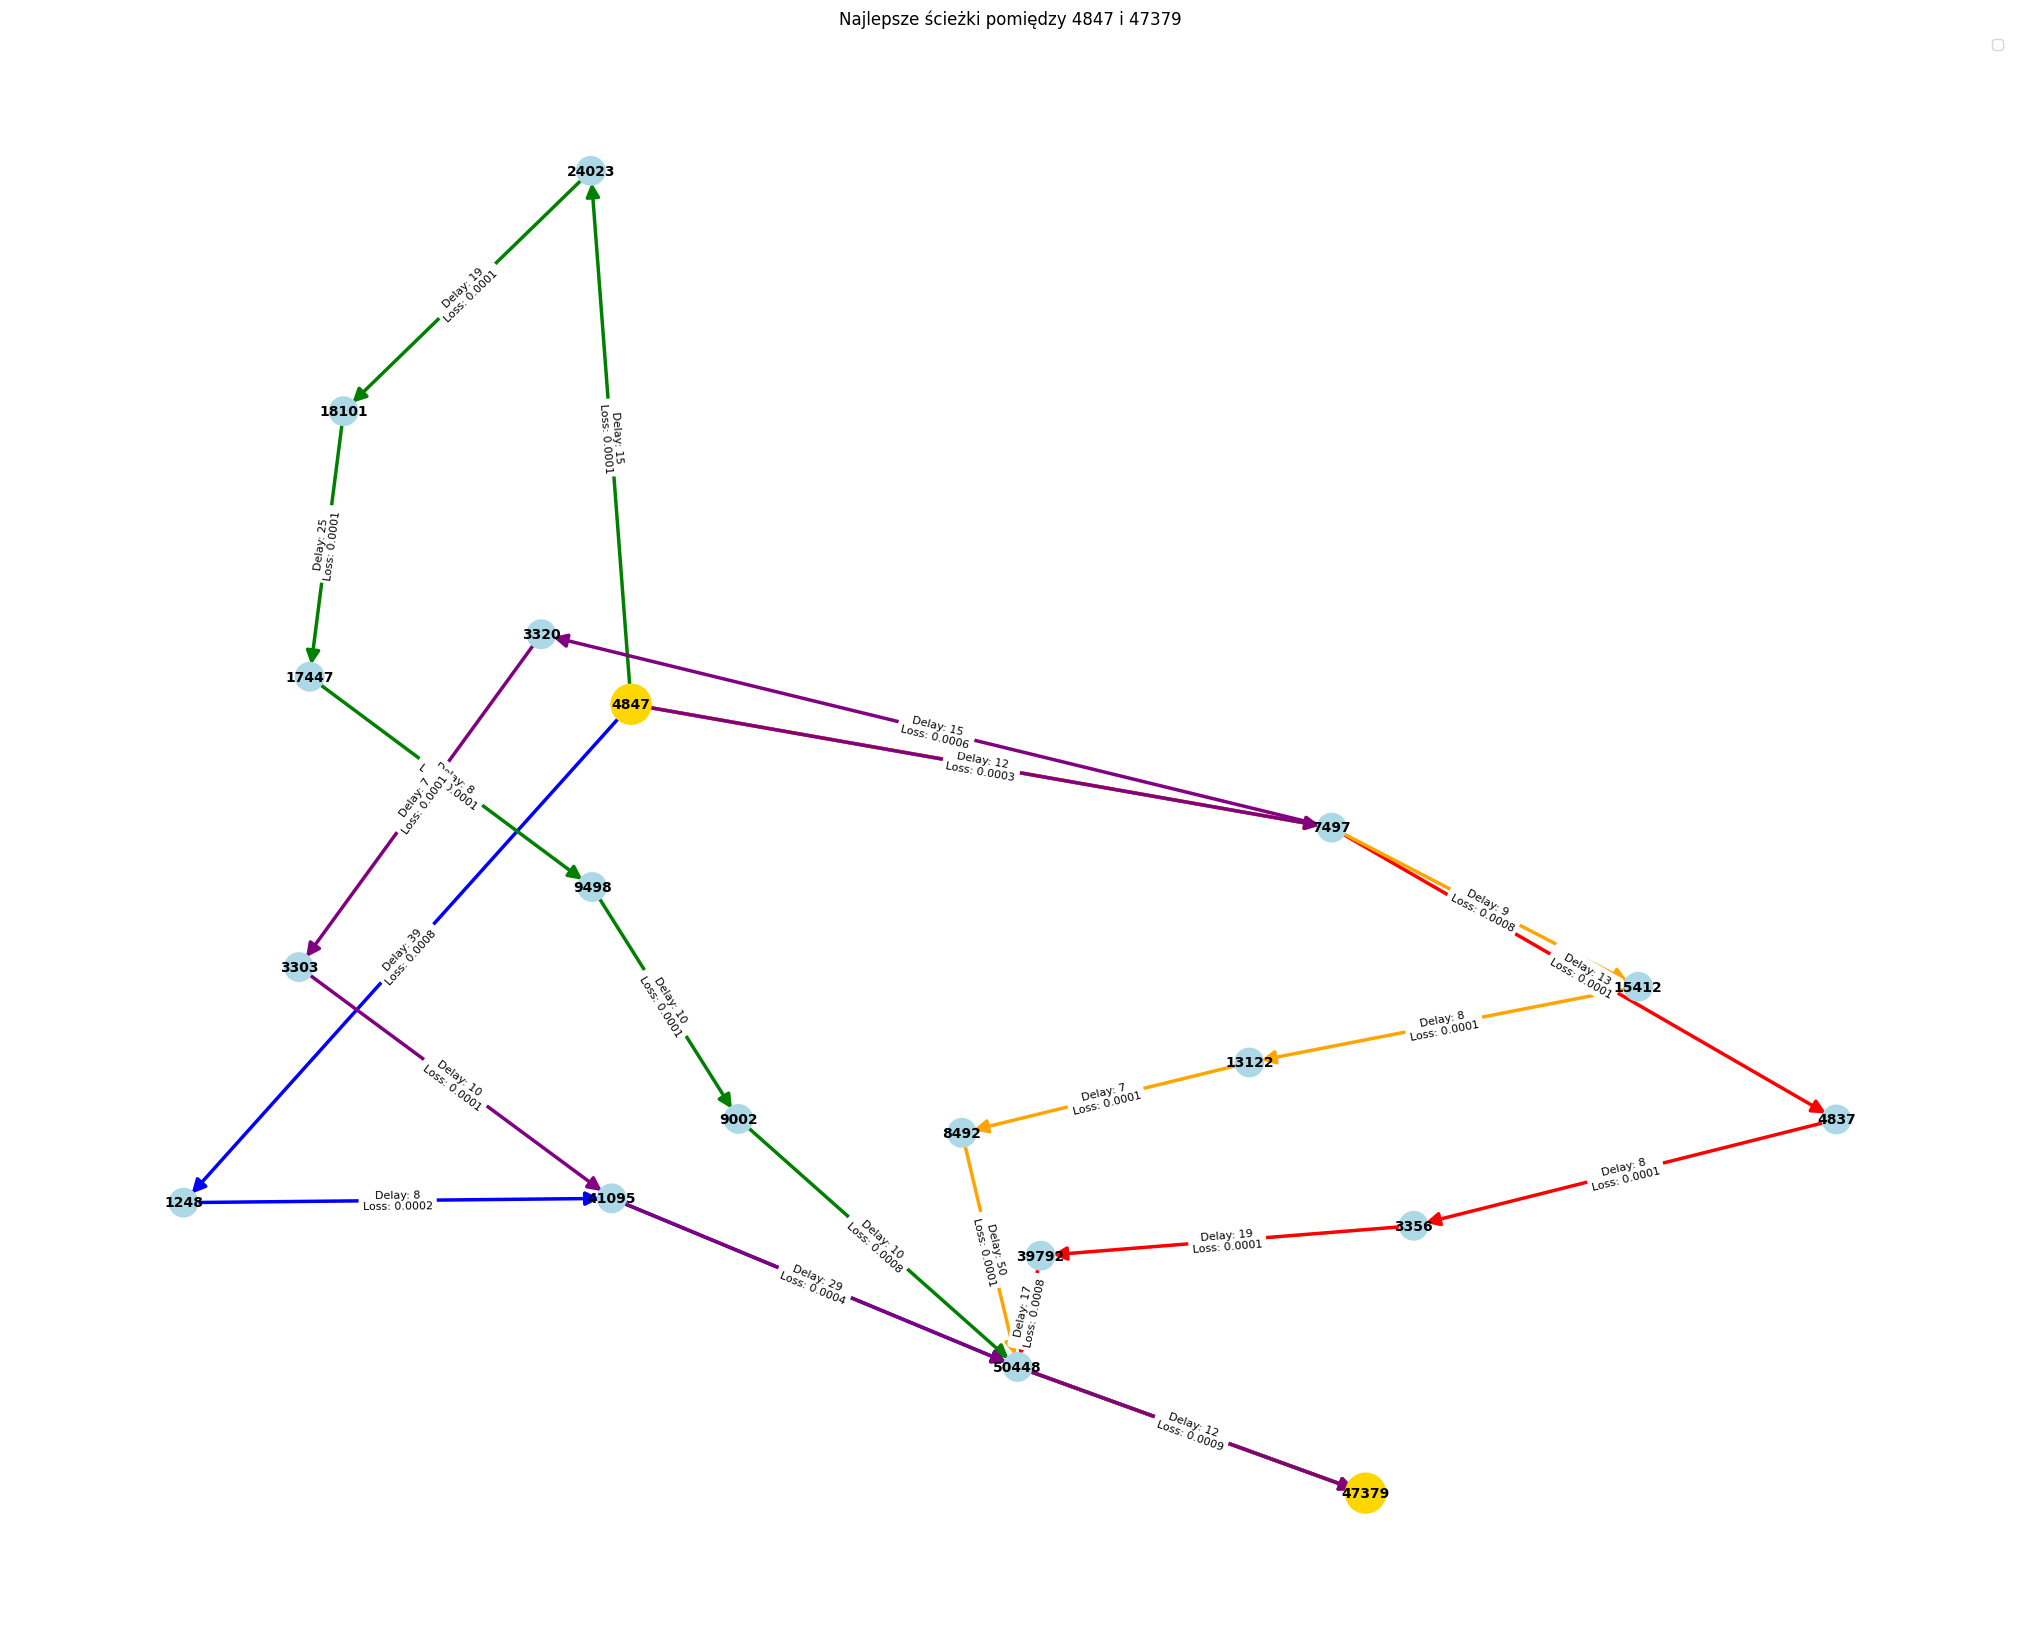

In [5]:
draw_paths_on_graph(my_data, yen_paths)

# R_MCP

[Algorytm R_MCP (Randomized Multi-Constrained Path)](https://www.sciencedirect.com/science/article/abs/pii/S1389128600002097?casa_token=O_4oSTV1t_IAAAAA:BGk-NUZTpzDDSrUXtVcacJ93X8whuw6bvcV31SEzm7XqpUI1V4iCol2gQTECtrLjVIpIDEaLbVU) jest podejściem losowego znajdowania ścieżki pomiędzy dwoma wierzchołkami w grafie skierowanym, przy zadanych ograniczeniach na więcej niż jedną metrykę. W naszym przypadku oznacza to, że algorytm szuka ścieżek, w których suma $-log(loss)$ oraz suma $delay$ nie przekraczają konkretnych, zadanych wartości. Po znalezieniu pierwszej satysfakcjonującej ścieżki algorytm się zatrzymuje. Zmodyfikowany przez nas R_MCP uruchamiany jest wielokrotnie, tak by kryteria akceptacji ścieżki były z każdym wywołaniem coraz węższe, oraz by wytypować więcej niż jedną ścieżkę.

Oryginalny algorytm R_MCP poszukuje jednej ścieżki, której koszt w każdej metryce (suma $delay$, suma $-log(loss)$) nie przekracza zadanego na wejściu ograniczenia. Przedstawiam poniżej jego skrócony sposób działania:

0. Wejście: $C$ - wektor ograniczeń metryk, $V$ - zadany graf, $s$ -wierzchołek początkowy, $t$-wierzchołek końcowy, $γ$ - liczba losowań

1. Przed przeszukiwaniem dla każdej metryki wywoływany jest algorytm Reverse Dijkstra, który dla każdego wierzchołka w $V$ wylicza (niezależnie od innych metryk) najniższy możliwy koszt scieżki łączącej go z $t$.

2. Następnie wykonywanych jest $\gamma$ prób przy użyciu losowego algorytmu BFS (Randomized Heuristic BFS). Zaczynając od $s$ losowo przemierza on graf dopóki nie dotrze do $t$ lub nie uda mu się opuścić żadnego z odwiedzonych dotychczas wierzchołków nie przekraczając przy tym ograniczeń.


Zmodyfikowaliśmy powyższy algorytm tak, by znajdował więcej niż jedną ścieżkę, szukając przy tym jak najlepszej.
0. Wejście: podajemy: $err$ - margines błędu (ułamek dziesiętny, domyślnie 5%), $n$ - ile ścieżek szukamy, $m$ - liczba iteracji, $penalty$- kara za powtórne znalezienie.

1. Inicjalizujemy program z ograniczeniami metryk $C$ ustawionymi na $+\infty$.
2. Uruchamiamy klasyczny R_MCP $m$ razy. Jeżeli algorytm znajdzie ścieżkę, aktualizuje $C$ na koszt znalezionej ścieżki pomnożony przez $1+err$. W ten sposób C jest stopniowo zawężany, ale wolniej wpadamy w minimum lokalne względem jednej metryki.
kwestia odpowiedniego doboru $err$ nie została poddana formalnej dyskusji. Metodą prób i błędów proponujemy $5%$.
3. Jeżeli wynikiem algorytmu jest ścieżka już znaleziona, wszystkie koszty (czyli $delay$ i $-log(loss)$) na jej krawędziach są mnożone razy $1+penalty$. Wysokie wartości $penalty$ prowadzą do silnej awersji programu do wyboru krawędzi wcześniej użytych, zaś  zbyt niskie mogą prowadzić do wyboru tych samych ścieżek.
4. Jeżeli R_MCP nie znajdzie ścieżki, $C$ jest resetowane na wektor $+\infty$. Co istotne resetowi nie podlegają zmienione w pkt.3 koszty na krawędziach znalezionych ścieżek.
5. Na koniec zwracanych jest $n$ najlepszych ścieżek posegregowanych według sumy $delay$. Jest to podyktowane tym, że w rozwiązaniu nie proponujemy żadnej miary mierzenia jakości ścieżek, a wartość sumy $delay$ w przeprowadzonych testach bardziej się waha.


In [6]:
import random
import numpy as np
import math
import copy
import pandas as pd
import networkx as nx


# ================================
# Wczytanie grafu z pandas do networx
# ================================
def load_graph_from_csv(df):

    G = nx.DiGraph()
    current_src = None
    for index, row in df.iterrows():
        if int(row["Domain 1"]) != 0:
            current_src = int(row["Domain 1"])
        if current_src is None:
            continue
        dst = int(row["Domain 2"])
        delay = int(row["Delay"])
        loss = float(row["Packet Loss"])
        cost_loss = float(row["Log Loss"])

        G.add_edge(current_src, dst, delay=delay, loss=loss, cost_loss=cost_loss)
    return G

# ================================
# Budowanie grafu odwrotnego
# ================================
def build_reverse_graph(G):
    return G.reverse(copy=True)


# ================================
# Funkcje pomocnicze: funkcje wagowe
# ================================
def weight_delay(d, cl):
    return d


def weight_cost_loss(d, cl):
    return cl


def weight_combined(d, cl):
    return d + cl


# ================================
# Reverse-Dijkstra
# ================================
def reverse_dijkstra(G_rev, t, weight_func):
    weight = lambda u, v, d: weight_func(d['delay'], d['cost_loss'])
    distances, _ = nx.single_source_dijkstra(G_rev, t, weight=weight)
    return distances


# ================================
# RH_BFS
# ================================
def RH_BFS(G, s, t, c1, c2, B1, B2, L):
    # Inicjalizacja
    D1 = {node: float('inf') for node in G.nodes()}
    D2 = {node: float('inf') for node in G.nodes()}
    pi = {node: None for node in G.nodes()}
    pred = {node: None for node in G.nodes()}

    D1[s] = 0
    D2[s] = 0
    pi[s] = -1  # s nie ma poprzednika
    Q = {s}

    while Q and pi[t] is None:
        u = random.choice(list(Q))
        Q.remove(u)
        for v in G.successors(u):
            if pi[v] is not None:
                continue
            data = G[u][v]
            d = data['delay']
            cl = data['cost_loss']
            loss = data['loss']
            if (D1[u] + d + B1.get(v, float('inf')) <= c1 and
                    D2[u] + cl + B2.get(v, float('inf')) <= c2 and
                    ((D1[u] + d) + (D2[u] + cl) + L.get(v, float('inf')) <= (c1 + c2))):
                D1[v] = D1[u] + d
                D2[v] = D2[u] + cl
                pi[v] = u
                edge_id = (d, loss)
                pred[v] = (u, edge_id)
                Q.add(v)
    return pi, pred


# ================================
# Odtwarzanie ścieżki na podstawie wyników RH_BFS
# ================================
def reconstruct_path(s, t, pi, pred):
    if pi[t] is None:
        return None
    path_vertices = []
    path_edges = []
    current = t
    while current != s:
        path_vertices.append(current)
        if pred[current] is None:
            break
        u, edge_id = pred[current]
        path_edges.append(edge_id)
        current = u
    path_vertices.append(s)
    path_vertices.reverse()
    path_edges.reverse()

    detailed_path = []
    for i in range(len(path_vertices) - 1):
        detailed_path.append(path_vertices[i])
        detailed_path.append(path_edges[i])
    detailed_path.append(path_vertices[-1])
    return detailed_path


# ================================
# Funkcja identyfikująca ścieżkę przy użyciu niezmienionych wag (z G_ref)
# ================================
def get_path_identifier(detailed_path, G_ref):
    """
    Zwraca krotkę (wierzchołki, krotka identyfikatorów krawędzi) dla danej ścieżki,
    wyliczonych na podstawie grafu referencyjnego G_ref.
    """
    vertices = detailed_path[::2]
    edge_ids = []
    for i in range(len(vertices) - 1):
        u = vertices[i]
        v = vertices[i+1]
        data = G_ref.get_edge_data(u, v)
        if data:
            edge_id =(data['delay'], data['loss'])
            edge_ids.append(edge_id)
        else:
            edge_ids.append(None)
    return (tuple(vertices), tuple(edge_ids))


# ================================
# Iteracyjna wersja R_MCP
# ================================
def iterative_R_MCP(G, s, t, gamma=100, iterations=50, best_count=5, err=0.05, penalty=0.1):
    """
    G - graf
    s - źródło
    t - cel
    gamma - liczba prób w każdej iteracji
    iterations - liczba iteracji
    best_count - ile najlepszych ścieżek zwrócić
    err - margines błędu
    penalty - kara (procentowa) za powtórzenie ścieżki; podnosi wagi krawędzi o (1+penalty) w G_search
    """
    C1 = float('inf')
    C2 = float('inf')
    best_paths = []  # lista: (delay_sum, cost_loss_sum, detailed_path)
    found_paths_identifiers = set()

    # G_search będzie modyfikowany podczas procesu (kara), G_checker pozostaje jako odniesienie do oryginalnych wag
    G_search = G.copy()
    G_checker = G.copy()

    for it in range(iterations):
        rev_G = build_reverse_graph(G_search)
        B1 = reverse_dijkstra(rev_G, t, weight_delay)
        B2 = reverse_dijkstra(rev_G, t, weight_cost_loss)
        L = reverse_dijkstra(rev_G, t, weight_combined)

        found_path = None
        for attempt in range(gamma):
            pi, pred = RH_BFS(G_search, s, t, C1, C2, B1, B2, L)
            if pi[t] is not None:
                detailed_path = reconstruct_path(s, t, pi, pred)
                # Obliczamy oryginalne koszty ścieżki korzystając z G_checker
                nodes_in_path = detailed_path[::2]
                original_delay_sum = 0
                original_cost_loss_sum = 0
                for i in range(len(nodes_in_path) - 1):
                    u = nodes_in_path[i]
                    v = nodes_in_path[i + 1]
                    data = G_checker.get_edge_data(u, v)
                    if data:
                        original_delay_sum += data['delay']
                        original_cost_loss_sum += data['cost_loss']

                # Aktualizujemy progi, bazując na oryginalnych kosztach
                if original_delay_sum <= C1 and original_cost_loss_sum <= C2:
                    C1 = original_delay_sum * (1 + err)
                    C2 = original_cost_loss_sum * (1 + err)
                found_path = (original_delay_sum, original_cost_loss_sum, detailed_path)

                # Obliczamy identyfikator ścieżki na podstawie G_checker (oryginalne wartości)
                path_identifier = get_path_identifier(detailed_path, G_checker)
                if path_identifier in found_paths_identifiers:
                    # Powtarzająca się ścieżka – zwiększamy wagi jedynie w G_search
                    for u, v, data in G_search.edges(data=True):
                        data['delay'] *= (1 + penalty)
                        data['cost_loss'] *= (1 + penalty)

                    continue

                # Zapisujemy identyfikator ścieżki, aby uniknąć powtórzeń
                found_paths_identifiers.add(path_identifier)
                best_paths.append((original_delay_sum, original_cost_loss_sum, detailed_path))
                break

        if found_path:
            pass
            #print(f"Iteracja {it + 1}: znaleziono ścieżkę o delay={found_path[0]}, cost_loss={found_path[1]}")
        else:
            #print(f"Iteracja {it + 1}: brak znalezionej ścieżki w tej iteracji.")
            C1=float('inf')
            C2=float('inf')

    best_paths_sorted = sorted(best_paths, key=lambda x: (x[0], x[1]))
    result = []
    for idx, (delay_sum, cost_loss_sum, detailed_path) in enumerate(best_paths_sorted[:best_count]):
        product_1_loss = math.exp(-cost_loss_sum)
        result.append([delay_sum, product_1_loss, idx + 1, detailed_path])
    return result
#POPRAWIONE

In [7]:
#Wczytanie danych
G = load_graph_from_csv(relevant_data)
print(G)

DiGraph with 36878 nodes and 206970 edges


In [8]:
# Węzły
s = 1  #Start
t = 3  #Koniec

iterations = 50 #ile iteracji ma wykonać program
best_count = 3 #ile ścieżek ma być zwróconych
err = 1 # margines błędu kosztów w kolejnych iteracjach
penalty = 100 #kara za ponowne znalezienie

best_paths_result = iterative_R_MCP(G, s, t, gamma=50, iterations=iterations, best_count=best_count, err=err, penalty=penalty)

if best_paths_result:
    print("Znalezione ścieżki:")
    for path_info in best_paths_result:
        delay_sum, product, path_number, detailed_path = path_info
        print(f"Ścieżka {path_number}: delay_sum = {delay_sum}, (1-loss)_product = {product:.8f}")
        print("Szczegółowa ścieżka:", detailed_path)
else:
    print("Nie znaleziono żadnej ścieżki spełniającej ograniczenia.")


Znalezione ścieżki:
Ścieżka 1: delay_sum = 62, (1-loss)_product = 0.99840071
Szczegółowa ścieżka: [1, (25154761271740300723, 0.0003), 3705, (16405279090265413515, 0.001), 7018, (15311593817581052614, 0.0002), 30071, (10936852726843609010, 0.0001), 3]
Ścieżka 2: delay_sum = 68, (1-loss)_product = 0.99850068
Szczegółowa ścieżka: [1, (241732311523, 0.0003), 3705, (409893919539, 0.0004), 174, (63060603006, 0.0008), 3]
Ścieżka 3: delay_sum = 77, (1-loss)_product = 0.99760201
Szczegółowa ścieżka: [1, (2696930883324506597192838907636823, 0.0003), 3705, (1758867967385547780777938418024015, 0.001), 7018, (2110641560862657336933526101628818, 0.0007), 293, (2462415154339766893089113785233621, 0.0004), 3]


# Podejście MINSUM-MINMAX

Jedno z możliwych podejść do problemu znalezienia ścieżki z dwoma rodzajami wag polega na uporządkowaniu ścieżek w pewnym porządku leksykograficznym: najpierw porządkując ze względu na maksimum jednego z parametrów, a następnie ze względu na sumę drugiego parametru. Biorąc pod uwagę multiplikatywną naturę parametru 'Packet Loss' (tzn. procent danych zachowanych przy transferze danych wzdłuż danej ścieżki to iloczyn procentów zachowanych danych na każdej krawędzi)rozsądnie jest zminimalizować właśnie jego maksimum (bo przy tym podejściu minimalizujemy sumę drugiego, addytywnego parametru; poniższy kod pozwala jednak zamienić role obu parametrów). Poniżej znajduje się implementacja funkcji realizującej ten pomysł. Działanie tego algorytmu wygląda następująco: (opis dotyczy bardziej naturalnego przypadku minimalizowania maksimum parametru 'Packet Loss', analogicznie jest jednak w przypadku minimalizowania maksimum parametru 'Delay'.)

Dla każdej wartości 'Packet Loss' (maximum) tworzymy graf zawierający tylko krawędzie nie przekraczające tej wartości (liczba uwzględnianych wartości może być duża i dlatego jest ograniczona przez zmienną max_iterations). Jeżeli znaleźliśmy już jakieś ścieżki we wcześniejszych obliczeniach, to przy kolejnych iteracjach nie uwzględniamy należących do nich krawędzi, aby znajdować rozłączne ścieżki. W takim grafie za pomocą wspomnianego już wcześniej algorytmu Dijkstry znajdujemy ścieżkę o najmniejszej sumie opóźnień. Następnie zapamiętujemy ją i usuwamy ją z grafu. Powtarzamy tą czynność, aż usuniemy wszystkie połączenia między danymi wierzchołkami. Następnie rozważamy większy graf, tj. zwiększamy maksymalną dopuszczalną wartość 'Packet Loss'. W ten sposób przy odpowiednio dużym parametrze max_iterations na pewno otrzymamy rozwiązanie optymalne w sensie porządku najpierw ze względu na jak najmniejszą wartość 'Packet Loss', a następnie ze względu na sumę 'Delay', a każde kolejne rozwiązanie będzie najlepszym możliwym rozwiązaniem rozłącznym z dotychczas znalezionymi rozwiązaniami.

Problem z tym podejściem jest taki, że nie gwarantuje znalezienia wymaganej liczby ścieżek, dlatego w ostatniej iteracji (kiedy nie zwracamy już uwagi na wartości 'Packet Loss') nie usuwamy z grafu krawędzi, których już użyliśmy, a zamiast tego zwiększamy ich wagi o pewną stałą, aby algorytm Dijkstry optymalizujący sumę opóźnień minimalizował liczbę pokrywających się krawędzi wśród znajdowanych ścieżek. Dlatego możliwe jest, że znalezione ścieżki będą miały wspólne krawędzie.

W dostarczonych danych jest tylko 10 różnych wartości parametru 'Packet Loss', dlatego rozsądne wydaje się użycie wartości max_iterations równej 10 przy wywoływaniu funkcji. Użycie mniejszej wartości może jedynie przyspieszyć obliczenia kosztem otrzymania gorszego wyniku. W tym algorytmie najistotniejszy ze względu na złożoność czasową jest algorytm Dijkstry, którego złożoność czasowa i pamięciowa wynoszą odpowiednio $O((V + E)\log V)$ i $O(V + E)$, a ponieważ każde wywołanie tego algorytmu kończy się znalezieniem ścieżki lub przejściem do kolejnej iteracji, ze względu na maksymalną wartość 'Packet Loss' liczba jego wywołań wynosić będzie co najmniej num_paths i co najwyżej $2\;\cdot$ max_iterations.

Wynikiem działania funkcji minsum_minmax() jest lista ścieżek postaci $[S,P,I,Path]$, gdzie:


*   $S$ To suma opóżnień na tej ścieżce
*   $P$ to iloczyn czynników postaci $(1-'PacketLoss')$ wzdłuż ścieżki, tj. ile danych nie zostanie utraconych przy jej wykorzystaniu
*   $I$ to indeks ścieżki (kolejność w jakiej została znaleziona)
*   $Path$ to lista postaci [wierzchołek, krawędź, wierzchołek, krawędź...] reprezentująca daną ścieżkę. (krawędź identyfikujemy jako listę powiązanych z nią dwóch wartości [delay, loss])

In [9]:
def minsum_minmax(graph_data: pd.DataFrame, source, target, max_iterations: int, num_paths: int, minmax_criterium: str = 'Packet Loss'):
    """
    graph_data in form: 'Domain 1', 'Domain 2',
    'Delay', 'Packet Loss'
    Intended to be used in 'Packet Loss' mode.
    """
    assert minmax_criterium in ['Delay', 'Packet Loss'], "minmax must be either 'Delay' or 'Packet Loss'"

    if minmax_criterium == 'Delay':
        minsum_criterium = 'Packet Loss'
    else:
        minsum_criterium = 'Delay'

    max_weight = graph_data[minsum_criterium].max()
    if len(graph_data[minmax_criterium].unique()) <= max_iterations:
        minmax_values = np.sort(graph_data[minmax_criterium].unique())
    else:
        minmax_values = np.linspace(graph_data[minmax_criterium].min(), graph_data[minmax_criterium].max(), num=max_iterations)

    found_paths = []

    for maximum in minmax_values:
        # Filtracja danych
        filtered = graph_data[graph_data[minmax_criterium] <= maximum]
        # Tworzenie grafu
        G = nx.MultiDiGraph()
        if(minmax_criterium == 'Delay'):
            for row in filtered.itertuples(index=False):
                G.add_edge(row[0], row[1], weight=row[2], minmax=row[3], original_weight=row[2])
        else:
            for row in filtered.itertuples(index=False):
                G.add_edge(row[0], row[1], weight=row[3], minmax=row[2], original_weight=row[3])
        # Usuwanie znalezionych wcześniej ścieżek / zwiększanie ich wag
        for path in found_paths:
            for i in range(0, len(path) - 2, 2):
                u = path[i]
                edge_attrs = path[i + 1]
                v = path[i + 2]
                delay, loss = edge_attrs

                for key, edge_data in G[u][v].items():
                    if edge_data['weight'] == delay and edge_data['minmax'] == loss:
                        if maximum != minmax_values[-1]:
                            G.remove_edge(u, v, key)
                        else:
                            G[u][v][key]['weight'] += 10 * max_weight
                        break

        while True:
            try:
                path_nodes = nx.dijkstra_path(G, source=source, target=target, weight='weight')
                path = []
                for u, v in zip(path_nodes[:-1], path_nodes[1:]):
                    found = False
                    for key, edge_data in G[u][v].items():
                        delay = edge_data['original_weight']
                        loss = edge_data['minmax']
                        path.extend([u, [delay, loss]])
                        found = True
                        break
                    if not found:
                        break
                path.append(path_nodes[-1])
                #Zapamiętujemy ścieżkę
                found_paths.append(path)
                # print("Found a path for maximum =", maximum)
                #Sprawdzamy czy nie mamy już wystarczająco dużo ścieżek
                if len(found_paths) == num_paths:
                    if minmax_criterium == 'Packet Loss':
                        for path in found_paths:
                            for i in range(1, len(path) - 1, 2):  # Every [loss, delay] element
                                loss, delay = path[i]
                                path[i] = [delay, loss]
                    retval = []
                    path_number = 1
                    for path in found_paths:
                        delay_sum = 0
                        loss_product = 1
                        for i in range(1, len(path) - 1, 2):
                            delay_sum += path[i][0]
                            loss_product = loss_product * (1 - path[i][1])
                        retval.append([delay_sum, loss_product, path_number, path])
                        path_number += 1
                    return retval
                #Usuwamy znalezioną ścieżkę / zwiększmy jej wagę w ostatniej iteracji
                for i in range(0, len(path) - 2, 2):
                    u = path[i]
                    edge_attrs = path[i + 1]
                    v = path[i + 2]
                    delay, loss = edge_attrs

                    if G.has_edge(u, v):
                        for key, edge_data in list(G[u][v].items()):
                            if edge_data.get('original_weight') == delay and edge_data.get('minmax') == loss:
                                if maximum != minmax_values[-1]:
                                    G.remove_edge(u, v, key)
                                else:
                                    G[u][v][key]['weight'] += 10 * max_weight
                                break
            except:
                # print("Skipping iteration over maximum =", maximum)
                break
    # Ustawiamy dane w ustalony sposób
    if minmax_criterium == 'Packet Loss':
        for path in found_paths:
            for i in range(1, len(path) - 1, 2):
                loss, delay = path[i]
                path[i] = [delay, loss]

    retval = []
    path_number = 1
    for path in found_paths:
        delay_sum = 0
        loss_product = 1
        for i in range(1, len(path) - 1, 2):
            delay_sum += path[i][0]
            loss_product = loss_product * (1 - path[i][1])
        retval.append([delay_sum, loss_product, path_number, path])
        path_number += 1
    return retval

#Przykład użycia
source = int(random.choice(relevant_data['Domain 1'].values))
target = int(random.choice(relevant_data['Domain 2'].values))
minmax_minsum_paths = minsum_minmax(relevant_data.iloc[:,:4], source, target, 20, 5)
for i in minmax_minsum_paths:
    print(i)

[122, 0.9995000999900007, 1, [46489, [18, 0.0001], 34695, [14, 0.0001], 559, [26, 0.0001], 3320, [44, 0.0001], 7018, [20, 0.0001], 46837]]
[161, 0.9993001699830006, 2, [46489, [46, 0.0002], 6939, [44, 0.0001], 701, [40, 0.0001], 7381, [31, 0.0003], 46837]]
[72, 0.9990002699820001, 3, [46489, [41, 0.0003], 4436, [17, 0.0001], 701, [14, 0.0006], 46837]]
[130, 0.9985005699270031, 4, [46489, [10, 0.0003], 9002, [43, 0.0001], 4436, [34, 0.0001], 1239, [43, 0.001], 46837]]
[97, 0.9994001299880004, 5, [46489, [20, 0.0002], 4826, [30, 0.0001], 6130, [27, 0.0002], 7018, [20, 0.0001], 46837]]


# Podejście MINMAX-MINMAX

Algorytm MINMAX-MINMAX jest prostą modyfikacją
algorytmu MAXMIN-MAXMIN z pracy ,,Bicriterion path problems'' P. Hansena. Algorytm ten pozwala na znalezienie minimalnego kompletnego zbioru Pareto optymalnych ścieżek, w których optymalizujemy dwa warunki: minimalizujemy maksymalny delay i minimalizujemy maksymalny loss.

Poniżej przedstawiamy zastosowany algorytm. Bardziej szczegółowe omówienie jest dostępne we wspomnianej wyżej pracy.

---

 ## Uwagi ogólne

 1. Cele:
   - Jednoczesna minimalizacja maksymalnego parametru $delay$ i minimalizacja maksymalnego parametru $loss$, tzn. znalezienie ścieżek, w których największy delay i loss krawędzi jest jak najmniejszy.
   - Znalezienie najmniejszego kompletnego zbioru ścieżek pareto-optymalnych, czyli takich, dla których żaden z celów nie może być polepszony bez pogorszenia drugiego.

### Formalne sformułowanie zadania

Mamy dany graf $G = (X, U)$, gdzie $X$ jest zbiorem wierzchołków, a $U \subseteq X \times X$ zbiorem krawędzi. Każda krawędź to para wierzchołków np. $(x_j,  x_k)$. Niech każdej krawędzi przysługują parametry $d_{jk}$, który nazywamy długością krawiędzi $(x_j, x_k)$ oraz $c_{jk}$, który nazywamy kosztem krawiędzi $(x_j, x_k)$. Niech będą też dane wierzchołki $x_1$ i $x_n$, czyli odpowiednio początkowy i końcowy wierzchołek.



Ścieżką od $x_1$ do $x_n$ $L$ nazywamy każdy zbiór par uporządkowanych spełniających
$$
L = \{ (x_1, x_2), (x_2, x_3), \ldots, (x_{n-1}, x_n) \}
\subseteq U.
$$

Niech $\mathcal{L}$ oznacza zbiór wszystkich ścieżek
od $x_1$ do $x_n$.
* Powiemy, że ścieżka $L \in \mathcal{L}$ jest **Pareto optymalna**, gdy nie ma innej ścieżki $L^* \in \mathcal{L}$, która by dawała lepszy wynik dla jednego kryterium nie pogarszając jednocześnie wyniku drugiego kryterium.  
* Powiemy, że podzbiór $S \subset \mathcal{L}$ jest **najmniejszym kompletnnym zbiorem ścieżek**, gdy
każda ścieżka, która nie jest w $S$ jest albo gorsza względem obu kryteriów (**zdominowana**) albo **ekwiwalentna** (dokładnie tak samo dobra, te same wartości dla obu badanych kryteriów) przynajmniej jednej ścieżce w $S$. Dodatkowo żadne dwie ścieżki w $S$ nie są ekwiwalentne.


**Cel**:
Znaleźć najmniejszy kompletny zbiór pareto optymalnych ścieżek $S$ z $x_1$ do $x_n$, gdzie rozważane kryteria są następujące:

1.  Minimalizacja maksimum długości ścieżki:

   $$
   \min_{L \in \mathcal{L}} \left( \max_{(x_j, x_k) \in L} d_{jk} \right)
   $$
2. Minimalizacja maksimum kosztu ścieżki:

   $$
   \min_{L \in \mathcal{L}} \left( \max_{(x_j, x_k) \in L} c_{jk} \right)
   $$

---

2. Notacja:
   - **W literaturze spotykamy się z ,,długością'' i ,,kosztem''. W  naszym zadaniu odpowiadają im odpowiednio ,,delay'' i ''loss''.**
   - $d_{kj}$: Długość (delay) krawędzi $(x_k, x_j)$.
   - $c_{kj}$: Koszt (loss) krawędzi $(x_k, x_j)$.
   - $\lambda_j = \min_{L_j \in \mathcal{L}} \left( \max_{(x_l, x_k) \in L} d_{lk} \right)$: Najmniejsza maksymalna długość ścieżki od wierzchołka początkowego do wierzchołka $j$ (obliczana w **części b**).
   - $\mu_j = \min_{Lj \in \mathcal{L}} \left( \max_{(x_l, x_k) \in L} c_{lk} \right)$: Najmniejszy maksymalny koszt ścieżki od wierzchołka początkowego do wierzchołka $j$ (obliczany w **części c**).
   - $C_{\max}$: Próg kosztu; ścieżki muszą mieć maksymalny koszt mniejszy od $C_{\max}$ w kolejnych iteracjach.
   - $T$: Zbiór wierdzchołków nieprzetworzonych.
   - $p_j$: Poprzednik węzła $j$ użyty do rekonstrukcji ścieżki.

---




## Algorytm
### a) Inicjalizacja
- Wczytaj dane grafu (wierzchołki, krawędzie, $d_{kj}$, $c_{kj}$).
- Ustaw $C_{\max} = \infty$ (początkowo brak ograniczenia kosztowego).
- Przejdź do **części b**.

### b) Obliczanie najmniejszego maksymalnego $delay$ ścieżek
**Cel**: Obliczyć $\lambda_j$, czyli najmniejszy maksymalny delay ścieżki od wierz początkowego do każdego węzła $j$.
1. **Inicjalizacja**:
   - $T = X$ (kompletny zbiór wierzchołków).
   - Ustaw $\lambda_1 = 0$, a dla $j \neq 1$ $\lambda_j = \infty$.
2. **Pętla**:
   - Wybierz wierzchołek $x_k \in T$ o najmniejszym $\lambda_j$.
   - Jeśli $k = n$ (wierzchołek docelowy), przejdź do **części c**.
   - Dla każdego sąsiada $j$ wierzchołka $x_k$:
     - Jeśli $c_{kj} < C_{\max}$ (wymuszamy ograniczenie parametru $loss$ z poprzednich iteracji):
       - Zaktualizuj $\lambda_j = \min(\lambda_j, \max(\lambda_k, d_{kj}))$.
   - Usuń $x_k$ ze zbioru $T$.
3. **Warunek Zakończenia**:
   - Jeśli wszystkie $\lambda_j = \infty$, ścieżki nie istnieją i algorytm kończy działanie.

### c) Obliczanie najmniejszego maksymalnego $loss$ ścieżek
**Cel**: Obliczyć $\mu_j$, czyli najmniejszy maksymalny loss ścieżki od węzła początkowego do każdego węzła $j$, przy jednoczesnym przestrzeganiu ograniczenia długości $d_{kj} \leq \lambda_j$ (ustalonego w **części b**).
1. **Inicjalizacja**:
   - $T = X$.
   - Ustaw $\mu_1 = 0$, a dla $j \neq 1$ $\mu_j = \infty$.
   - Resetuj poprzedników: $p_j = 0$.
2. **Pętla**:
   - Wybierz wierzchołek $x_k \in T$ o najmniejszym $\mu_j$.
   - Jeśli $k = n$, przejdź do **części d**.
   - Dla każdego sąsiada $j$ wierzchołka $x_k$:
     - Jeśli $c_{kj} < C_{\max}$ oraz $d_{kj} \leq \lambda_j$ (wymuszamy ograniczenie długości z **części b**):
       - Zaktualizuj $\mu_j = \min(\mu_j, \max(\mu_k, c_{kj}))$.
       - Ustaw $p_j = k$ (zapisz poprzednika).
   - Usuń $x_k$ ze zbioru $T$.

### d) Wynik i Iteracja
1. **Wypisanie jednej z Pareto optymalnych ścieżek**:
   - Wypisz $\lambda_n$ oraz $\mu_n$ (minimalny maksymalny $loss$).
   - Zrekonstruuj ścieżkę od $n$ do wierzchołka początkowego używając zapisanych poprzedników $p_j$.
2. **Aktualizacja ograniczeń i szukanie kolejnych Parteto optymalanych ścieżek**:
   - Ustaw $C_{\max} = \mu_n$ (kolejne ścieżki muszą mieć maksymalny $loss$ mniejszy niż $\mu_n$).
   - Powróć do **części b** w celu znalezienia kolejnej ścieżki Pareto optymalnej, aż to wypisania całego najmniejszego kompletnego zbioru ścieżek.

---

## Złożoność

Algorytm ma złożoność $O(E^2 \log V )$, gdzie $E$ to liczba krawędzi, a $V$ liczba wierzchołków grafu. Są też możliwe inne
  implementacje algorytmu o złożoności $O(m^2 \log t)$, gdzie $t$
  jest mocą zbioru wartości parametrów delay i loss. Szczegółowe omówienie złożoności jest dostępne we wspomnianej wyżej pracy.

## Podsumowanie


Jak widać poniżej, dla losowych ścieżek początkowych algorytm generuje zwykle zbiór ok. 4 elementowy, czyli generuje mniej więcej tyle ścieżek, ile życzy sobie Zamawiający. Jeśli tylko funkcja celu okaże się akceptowalna dla zastosowania Zamawiającego, to to rozwiązanie ma dużą zaletę udowodnionej Pareto optymalności znalezionych ścieżek.

---

Poniżej przedstawiamy własną implementację powyższego algorytmu.



In [10]:
import heapq
import networkx as nx
import pandas as pd
import random

def minmax_minmax(graph_df, source, target):
    """
    Compute Pareto-optimal paths from 'source' to 'target'.
    Parameters:
        graph_df (pd.DataFrame): A DataFrame containing edge data. Expected columns:
            - 'Domain 1' (source node)
            - 'Domain 2' (target node)
            - 'Delay'     (edge delay)
            - 'Packet Loss' (edge packet loss)
        source (int): The starting node.
        target (int): The destination node.

    Returns:
        list of tuples: Each tuple is (max_delay, max_cost, path) where
            - max_delay: the maximal delay encountered along that path,
            - max_cost: the maximal loss encountered along that path,
            - path: the sequence of nodes from source to target.
    """
    # Build a directed graph using networkx.
    # The edge attributes used here are 'Delay' and 'Packet Loss'
    G = nx.from_pandas_edgelist(
        graph_df,
        source='Domain 1',
        target='Domain 2',
        edge_attr=['Delay', 'Packet Loss'],
        create_using=nx.DiGraph()
    )

    def min_max_length(G, target, C_max, source):
        """Finds the path from source to target with the minimal maximum delay,
           considering only edges with cost <= C_max."""
        # Initialize each node's max delay along the best found path so far
        lambda_ = {node: float('inf') for node in G.nodes()}
        lambda_[source] = 0
        T = set(G.nodes())
        heap = [(lambda_[source], source)]
        heapq.heapify(heap)

        while heap:
            current_lambda, u = heapq.heappop(heap)
            if u not in T:
                continue
            T.remove(u)

            # Early break when target is reached (can be omitted if you want full relaxation)
            if u == target:
                break

            # Inspect outgoing edges from node u
            for v, data in G[u].items():
                c_uv = data.get('Packet Loss', float('inf'))
                # skip any edge that violates the current cost constraint
                if c_uv > C_max:
                    continue
                d_uv = data.get('Delay', float('inf'))
                new_lambda = max(current_lambda, d_uv)
                if new_lambda < lambda_.get(v, float('inf')):
                    lambda_[v] = new_lambda
                    heapq.heappush(heap, (new_lambda, v))

        return lambda_

    def min_max_cost(G, target, lambda_max, source):
        """Finds the path from source to target with the minimal maximum loss,
           considering only edges with delay <= lambda_max."""
        mu = {node: float('inf') for node in G.nodes()}
        mu[source] = 0
        predecessors = {node: None for node in G.nodes()}
        T = set(G.nodes())
        heap = [(mu[source], source)]
        heapq.heapify(heap)

        while heap:
            current_mu, u = heapq.heappop(heap)
            if u not in T:
                continue
            T.remove(u)

            if u == target:
                break

            for v, data in G[u].items():
                d_uv = data.get('Delay', float('inf'))
                # Only consider edges that respect the delay constraint
                if d_uv > lambda_max:
                    continue
                c_uv = data.get('Packet Loss', float('inf'))
                new_mu = max(current_mu, c_uv)
                if new_mu < mu.get(v, float('inf')):
                    mu[v] = new_mu
                    predecessors[v] = u
                    heapq.heappush(heap, (new_mu, v))

        return mu, predecessors

    def annotate_path_from_graph(G, path):
        annotated = [path[0]]
        for u, v in zip(path, path[1:]):
            data = G[u][v]
            d, l = data['Delay'], data['Packet Loss']
            annotated.extend([[d, l], v])
        return annotated

    def reconstruct_path(predecessors, target, source):
        """Reconstructs a path from source to target using the predecessor information."""
        path = []
        current = target
        while current is not None:
            path.append(current)
            current = predecessors.get(current)
        # Verify that we reached the source and return the reversed path if we did
        return path[::-1] if path and path[-1] == source else []

    # Initialize the cost constraint as infinity
    C_max = float('inf')
    pareto_front = []

    while True:
        # (b) Find a path that minimizes the maximum delay subject to cost constraint C_max.
        lambda_ = min_max_length(G, target, C_max, source)
        # If no feasible path exists, stop the algorithm.
        if lambda_.get(target, float('inf')) == float('inf'):
            break
        # (c) Now minimize the maximum cost subject to the delay constraint given by lambda_[target].
        mu, predecessors = min_max_cost(G, target, lambda_[target], source)
        if mu.get(target, float('inf')) == float('inf'):
            break
        # (d) Reconstruct the Pareto-optimal path using the predecessor information.
        # print(predecessors)
        path = reconstruct_path(predecessors, target, source)
        if not path:
            break
        # This function makes the format compatible with benchmarks.
        annotated = annotate_path_from_graph(G, path)
        def summarize_path(annotated_path, index):
            S = 0
            P = 1.0
            for pair in annotated_path[1::2]:
                delay, loss = pair
                S += delay
                P *= (1 - loss)
            return [S, P, index, annotated_path]
        pareto_front.append(summarize_path(annotated, len(pareto_front)+1))

        # Update cost constraint to exclude paths with max cost >= current μ[target]
        # This value depents on the order of magnitude of the costs and the differences
        # between value of cost parameters. 1e-6 is sufficiently small and
        # the algorithm is already fast, so we don't need to optimize.
        C_max = mu[target] - 1e-6


    return pareto_front


source = int(random.choice(relevant_data['Domain 1'].values))
target = int(random.choice(relevant_data['Domain 2'].values))


# Compute Pareto-optimal paths from source to target.
minmax_minmax_paths = minmax_minmax(relevant_data, source, target)
# print(minmax_minmax_paths)
# Print out the Pareto-optimal paths.
for i in minmax_minmax_paths:
  print(i)

# for max_delay, max_cost, path in minmax_minmax_paths:
#     print(f"Max Delay: {max_delay}, Max Loss: {max_cost}, Path: {path}")

[171, 0.9975026483936265, 1, [25983, [20, 0.0002], 701, [20, 0.0002], 1280, [12, 0.0001], 293, [17, 0.0001], 3549, [16, 0.0002], 4436, [11, 0.0002], 577, [17, 0.0002], 1273, [19, 0.0002], 5568, [15, 0.0002], 3218, [7, 0.0001], 20632, [17, 0.0008], 43726]]


# Testy algorytmów

W celu porównania zachowania przedstawionych algorytmów używamy ich kilka razy do znalezienia ścieżek między dwoma losowymi wierzchołkami i wyliczamy kilka podstawowych statystyk: średnie opóźnienie, średni ułamek zachowanych danych, procent unikalnych krawędzi (tzn. takich, które w wyniku jednego uruchomienia algorytmu należą tylko do jednej ze znalezionych ścieżek) i procent znalezionych ścieżek (na wypadek gdyby algorytm znalazł mniej ścieżek niż tego chcemy).

Poniżej znajduje się użyty w tym celu kod. W każdym teście odpowiednia funkcja została użyta 100 razy do znalezienia 10 ścieżek. Jedyny wyjątek to test algorymu R_MCP, gdzie szukanych jest 5 ścieżek, 20 razy i dopuszczonych jest tylko 10 iteracji algorytmu (ze względu na jego długi czas działania).

Analizując uzyskane wyniki można dokonać wyboru interesującego nas algorytmu. Na szczególną uwagę zasługuje zmodyfikowany algorytm Yena - jego działanie jest najprostsze, szybkie, pozwala manipulować wagami w zależności od potrzeb i gwarantuje uzyskanie wymaganej liczby ścieżek (poza sytuacjami, gdy nie istnieje tyle ścieżek ile wymagamy).

Algorytm MINMAX-MINMAX jest z kolei zdecydowanie najszybszy spośród zaprezentowanych rozwiązań. Zwraca on jednak zazwyczaj nie wystarczająco wiele ścieżek.

## Kod funkcji liczącej podstawowe statystyki dla algorytmów

In [11]:
from collections import Counter
import statistics

random.seed(1234)
#Zakłada że dane są w DataFrame'ie relevant_data
def test_vertices(number:int):
    vertices = []
    for i in range(number):
        a = int(random.choice(relevant_data['Domain 1'].values))
        b = int(random.choice(relevant_data['Domain 2'].values))
        vertices.append([a,b])
    return vertices

def make_summary(number_of_paths, number_of_tests, data):
    merged_delays = []
    merged_product_1_losses = []
    block_summaries = []
    for block in data:
        sums_of_delays = [d[0] for d in block]
        product_1_losses = [d[1] for d in block]
        avg_delay = sum(sums_of_delays) / len(sums_of_delays)
        avg_product_1_loss = sum(product_1_losses) / len(product_1_losses)
        num_paths = len(block)
        edge_counter = Counter()
        for entry in block:
            path = entry[3]
            merged_delays.append(entry[0])
            merged_product_1_losses.append(entry[1])
            for i in range(0, len(path) - 2, 2):
                start_vertex = path[i]
                edge = path[i + 1]
                end_vertex = path[i + 2]
                edge_key = (start_vertex, end_vertex, edge[0], edge[1])  # (u, v, delay, loss)
                edge_counter[edge_key] += 1

        # Count how many edges appear only once
        unique_edges = sum(1 for count in edge_counter.values() if count == 1)
        total_edges = len(edge_counter)
        unique_edge_percentage = (unique_edges / total_edges * 100) if total_edges > 0 else 0

        # Append the summary for this block
        block_summaries.append({
            "avg_delay": avg_delay,
            "avg_product_1_loss": avg_product_1_loss,
            "num_paths": num_paths,
            "unique_edge_percentage": unique_edge_percentage
        })
    total_paths = sum(b["num_paths"] for b in block_summaries)

    complete_avg_delay = statistics.mean(merged_delays)
    complete_std_delay = statistics.stdev(merged_delays) if len(merged_delays) > 1 else 0.0

    complete_avg_product_1_loss = statistics.mean(merged_product_1_losses)
    complete_std_product_1_loss = statistics.stdev(merged_product_1_losses) if len(merged_product_1_losses) > 1 else 0.0
    complete_unique_edge_percentage = sum(b["unique_edge_percentage"] * b["num_paths"] for b in block_summaries) / total_paths

    complete_summary = {
        "Średnia suma delay": complete_avg_delay,
        "Odchylenie standardowe sumy delay": complete_std_delay,
        "Ułamek zachowanych danych": complete_avg_product_1_loss,
        "Odchylenie standardowe ułamka zachowanych danych": complete_std_product_1_loss,
        "Procent krawędzi należących tylko do 1 ścieżki": complete_unique_edge_percentage,
        "Procent znalezionych ścieżek": 100*total_paths/(number_of_paths*number_of_tests)
    }
    return complete_summary

## Test algorytmu minimalizującego liczbę hopów

Dla porównania rozwiązań poniżej znajduje się test zmodyfikowanego algorytmu Yena, używający wag wszystkich krawędzi równych jeden. Oznacza to, że minimalizowana jest liczba hopów i ignorowane są parametry 'Delay' i 'Packet Loss'. Jednocześnie algorytm ten wciąż dba o rozłączność ścieżek zwiększając koszty już użytych krawędzi.

In [12]:
def make_data_hop(number_of_paths, number_of_tests, max_iterations, scale_factor):
    my_data = relevant_data.copy()
    logloss_std = my_data['Log Loss'].std()
    delay_std = my_data['Delay'].std()
    my_data['Edge Cost'] = 1
    data = []
    for vertices in test_vertices(number_of_tests):
        data.append(find_shortest_paths_yen(my_data, vertices[0], vertices[1], number_of_paths, max_iterations, scale_factor))
    return data

print(f"Test zmodyfikowanego algorytmu Yena z kosztem krawędzi równym 1 (liczbie hopów)")
summary_hop = make_summary(10,100, make_data_hop(10, 100, 100, 1.2))
for i in summary_hop:
    print(i, ":", summary_hop[i])

Test zmodyfikowanego algorytmu Yena z kosztem krawędzi równym 1 (liczbie hopów)
Średnia suma delay : 85.282
Odchylenie standardowe sumy delay : 35.718935010975876
Ułamek zachowanych danych : 0.9983022045179796
Odchylenie standardowe ułamka zachowanych danych : 0.0007194316594791139
Procent krawędzi należących tylko do 1 ścieżki : 90.24971539501577
Procent znalezionych ścieżek : 100.0


## Test zmodyfikowanego algorytmu Yena

In [13]:
def make_data_yen(number_of_paths, number_of_tests, max_iterations, scale_factor, alpha):
    my_data = relevant_data.copy()
    logloss_std = my_data['Log Loss'].std()
    delay_std = my_data['Delay'].std()
    my_data['Edge Cost'] = my_edge_cost(my_data['Delay'], my_data['Log Loss'], delay_std, logloss_std, alpha)
    data = []
    for vertices in test_vertices(number_of_tests):
        data.append(find_shortest_paths_yen(my_data, vertices[0], vertices[1], number_of_paths, max_iterations, scale_factor))
    return data

for alpha in [0, 0.25, 0.5, 0.75, 1]:
    print(f"Test zmodyfikowanego algorytmu Yena z alpha = {alpha}")
    summary_yen = make_summary(10,100, make_data_yen(10, 100, 100, 1.2, alpha))
    for i in summary_yen:
        print(i, ":", summary_yen[i])
    print("")

Test zmodyfikowanego algorytmu Yena z alpha = 0
Średnia suma delay : 122.537
Odchylenie standardowe sumy delay : 45.26516946357946
Ułamek zachowanych danych : 0.9992237691742948
Odchylenie standardowe ułamka zachowanych danych : 0.0004587098387721397
Procent krawędzi należących tylko do 1 ścieżki : 81.08401799892049
Procent znalezionych ścieżek : 100.0

Test zmodyfikowanego algorytmu Yena z alpha = 0.25
Średnia suma delay : 72.765
Odchylenie standardowe sumy delay : 30.74666050373816
Ułamek zachowanych danych : 0.9990778433700429
Odchylenie standardowe ułamka zachowanych danych : 0.00048067695025953976
Procent krawędzi należących tylko do 1 ścieżki : 81.40590216674946
Procent znalezionych ścieżek : 100.0

Test zmodyfikowanego algorytmu Yena z alpha = 0.5
Średnia suma delay : 62.14052953156823
Odchylenie standardowe sumy delay : 27.775395335796382
Ułamek zachowanych danych : 0.9988469987391237
Odchylenie standardowe ułamka zachowanych danych : 0.0005893831529978057
Procent krawędzi nale

## Test R_MCP

In [14]:
def make_data_R_MCP(number_of_paths, number_of_tests, gamma, iterations):
    data = []
    for vertices in test_vertices(number_of_tests):
        data.append(iterative_R_MCP(load_graph_from_csv(relevant_data), vertices[0], vertices[1],
                                    100, iterations, number_of_paths, err = 0.05, penalty = 100))
    return data

summary_R_MCP = make_summary(10,20, make_data_R_MCP(10, 20, 50, 10))
print("Test R_MCP")

for i in summary_R_MCP:
    print(i, ":", summary_R_MCP[i])

Test R_MCP
Średnia suma delay : 99.21495327102804
Odchylenie standardowe sumy delay : 46.719158535768265
Ułamek zachowanych danych : 0.997972780336377
Odchylenie standardowe ułamka zachowanych danych : 0.000877760931831331
Procent krawędzi należących tylko do 1 ścieżki : 90.93451552759089
Procent znalezionych ścieżek : 53.5


## Test MINSUM-MINMAX

In [15]:
def make_data_minsum_minmax(number_of_paths, number_of_tests, max_iterations, minmax_criterium):
    data = []
    for vertices in test_vertices(number_of_tests):
        data.append(minsum_minmax(relevant_data.iloc[:,:4], vertices[0], vertices[1], max_iterations, number_of_paths, minmax_criterium))
    return data

summary_minsum_minmax_pl = make_summary(10,100, make_data_minsum_minmax(10, 100, 20, 'Packet Loss'))
summary_minsum_minmax_d = make_summary(10,100, make_data_minsum_minmax(10, 100, 20, 'Delay'))

print("Test MINSUM-MINMAX dla minmax = 'Packet Loss'")
for i in summary_minsum_minmax_pl:
    print(i, ":", summary_minsum_minmax_pl[i])
print("Test MINSUM-MINMAX dla minmax = 'Delay'")
for i in summary_minsum_minmax_d:
    print(i, ":", summary_minsum_minmax_d[i])

Test MINSUM-MINMAX dla minmax = 'Packet Loss'
Średnia suma delay : 124.012
Odchylenie standardowe sumy delay : 49.72929578084591
Ułamek zachowanych danych : 0.9989213485789191
Odchylenie standardowe ułamka zachowanych danych : 0.00064754761443247
Procent krawędzi należących tylko do 1 ścieżki : 95.13752519946647
Procent znalezionych ścieżek : 100.0
Test MINSUM-MINMAX dla minmax = 'Delay'
Średnia suma delay : 44.757
Odchylenie standardowe sumy delay : 24.83817396440177
Ułamek zachowanych danych : 0.9976165933913911
Odchylenie standardowe ułamka zachowanych danych : 0.0010949262253589882
Procent krawędzi należących tylko do 1 ścieżki : 71.8530906247713
Procent znalezionych ścieżek : 100.0


## Test MINMAX-MINMAX

In [16]:
def make_data_minmax_minmax(number_of_paths, number_of_tests):
    data = []
    for vertices in test_vertices(number_of_tests):
        data.append(minmax_minmax(relevant_data.iloc[:,:4], vertices[0], vertices[1]))
    return data

summary_minmax_minmax = make_summary(10,100,make_data_minmax_minmax(10,100))

print("Test MINMAX-MINMAX")
for i in summary_minmax_minmax:
    print(i, ":", summary_minmax_minmax[i])

Test MINMAX-MINMAX
Średnia suma delay : 111.9
Odchylenie standardowe sumy delay : 72.24559678503773
Ułamek zachowanych danych : 0.9978366467419537
Odchylenie standardowe ułamka zachowanych danych : 0.001583316006718729
Procent krawędzi należących tylko do 1 ścieżki : 91.24575487203774
Procent znalezionych ścieżek : 26.0


#Literatura

Hansen, Pierre. "Bicriterion path problems." Multiple Criteria Decision Making Theory and Application: Proceedings of the Third Conference Hagen/Königswinter, West Germany, August 20–24, 1979. Berlin, Heidelberg: Springer Berlin Heidelberg, 1980.


Korkmaz, Turgay, and Marwan Krunz. "A randomized algorithm for finding a path subject to multiple QoS requirements." Computer Networks 36.2-3 (2001): 251-268.

